In [1]:
import sys
import os
sys.path.insert(0, os.getcwd())

import torch
from kaolin.conversions.voxelgridconversions import voxelgrid_to_pointcloud
from kaolin.rep import VoxelGrid, PointCloud
from vis_tools import *
from shapenet_pytorch import ShapeNetDataset
from IPython.display import display
from IPython.core.display import HTML
import pandas as pd
from pyntcloud import PyntCloud

In [2]:
# Definition of threshold function used by kaolin

# def threshold(voxel: Union[torch.Tensor, VoxelGrid], thresh: float,
#               inplace: Optional[bool] = True):
#     r"""Binarizes the voxel array using a specified threshold.

#     Args:
#         voxel (torch.Tensor): Voxel array to be binarized.
#         thresh (float): Threshold with which to binarize.
#         inplace (bool, optional): Bool to make the operation in-place.

#     Returns:
#         (torch.Tensor): Thresholded voxel array.

#     """
#     if isinstance(voxel, VoxelGrid):
#         voxel = voxel.voxels
#     if not inplace:
#         voxel = voxel.clone()
#     helpers._assert_tensor(voxel)
#     voxel[voxel <= thresh] = 0
#     voxel[voxel > thresh] = 1
#     return voxel

In [3]:
sys.path[0]

'/media/adityac/Storage/Learnt-Stereo-Machine/lsm'

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vox_dir =  os.path.join(sys.path[0], 'shapenet_sample/voxels/modelVoxels64')
im_dir = os.path.join(sys.path[0], 'shapenet_sample/renders')
split_file = os.path.join(sys.path[0], 'shapenet_sample/splits_sample.json')

In [5]:
categories = ['bench']
dataset = ShapeNetDataset(im_dir, vox_dir, 4, 64, split_file, train=False, categories=categories)
imgs, vol, K, R = dataset[0]
print("imgs shape" + str(imgs.shape))
print("imgs type" + str(type(imgs)))

imgs shape(4, 3, 224, 224)
imgs type<class 'numpy.ndarray'>


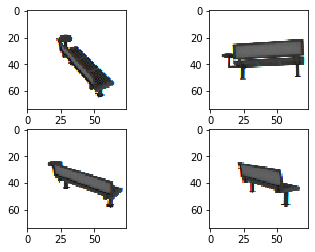

In [6]:
plot_images(imgs, "test.png")

In [7]:
vol.shape

(1, 64, 64, 64)

In [8]:
v = torch.Tensor(vol[0])
print(v.shape)
cloud = voxelgrid_to_pointcloud(v, num_points=int((v.shape[0]/2)**3), thresh=0.0, mode='full', normalize=False)

torch.Size([64, 64, 64])


In [9]:
print(cloud.requires_grad)

False


In [10]:
cloud.shape

torch.Size([32768, 3])

In [11]:
cloud[:15]

tensor([[37.0946, 42.7997, 32.7311],
        [36.4013,  8.8228, 32.9272],
        [37.8101, 42.8278, 32.1450],
        [26.4096, 11.1800, 38.4260],
        [32.3065, 43.1297, 20.2477],
        [29.2166, 16.7340, 32.4907],
        [36.0941, 59.8592, 37.9696],
        [30.8882, 47.1702, 32.3605],
        [38.3240, 55.5272, 38.1303],
        [26.7625, 21.5943, 32.4198],
        [33.2982, 12.3272, 32.2909],
        [37.1709,  4.7158, 32.7081],
        [33.4670, 49.6522, 30.9372],
        [29.3498, 26.9935, 32.9409],
        [34.4199, 44.9232, 31.4407]])

In [12]:
points = pd.DataFrame(cloud.numpy())
points.columns = ['x', 'y', 'z']
points.head()

,x,y,z
0,37.094589,42.799740,32.731068
1,36.401344,8.822797,32.927212
2,37.810055,42.827774,32.144989
3,26.409649,11.180004,38.425957
4,32.306458,43.129696,20.247749


In [13]:
pynts = PyntCloud(points)
pynts

PyntCloud
32768 points with 0 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: 31.441619873046875, 29.057846069335938, 33.08564376831055
Other attributes:

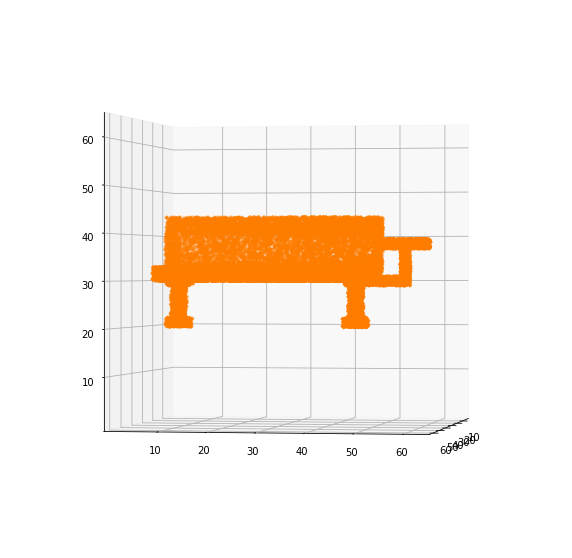

In [14]:
pynts.plot(azim=10)

In [99]:
help(PyntCloud.plot)

Help on function plot in module pyntcloud.core_class:

plot(self, backend=None, scene=None, width=800, height=500, background='black', mesh=False, use_as_color=['red', 'green', 'blue'], initial_point_size=None, cmap='hsv', polylines=None, linewidth=5, return_scene=False, output_name='pyntcloud_plot', elev=0.0, azim=90.0, **kwargs)
    Visualize a PyntCloud  using different backends.
    
    Parameters
    ----------
    backend: {"pythreejs", "threejs", "pyvista", "matplotlib"}, optional
        Default: "pythreejs"
        Used to select one of the available libraries for plotting.
    
    width: int, optional
        Default: 800
    
    height: int, optional
        Default: 500
    
    background: str, optional
        Default: "black"
        Used to select the default color of the background.
        In some backends, i.e "pythreejs" the background can be dynamically changed.
    
    use_as_color: str or ["red", "green", "blue"], optional
        Default: ["red", "green", "b